# Tutorial: Manipulating OOMMF vector field files

In this tutorial, reading and writing of OOMMF vector field files (omf and ohf) are demonstrated. As usual, we need to import the Field class, but this time also the read_oommf_file function.

In [1]:
import numpy as np
import discretisedfield as df

We create a three-dimansional vector field with domain that spans between:

- minimum coordinate $c_{1} = (0, 0, 0)$ and
- maximum coordinate $c_{2} = (100 \,\text{nm}, 100 \,\text{nm}, 5 \,\text{nm})$,

with discretisation $d = (5 \,\text{nm}, 5 \,\text{nm}, 5 \,\text{nm})$.

In [2]:
c1 = (0, 0, 0)
c2 = (10, 10, 5)
d = (1, 1, 1)
mesh = df.Mesh(c1, c2, d)
dim = 3

Now, we can create a vector field object and initialise it so that:

$$f(x, y, z) = (x+1, x+y+2, xy+3)$$

In [3]:
def m_init(pos):
    x, y, z = pos
    
    return (x+1, x+y+2, x*y+3)

field = df.Field(mesh, dim=3, value=m_init)

Please note, that in this case we provided a field value as a field argument, which internally calls a set method explained in other tutorials.

If we plot the field, we get:

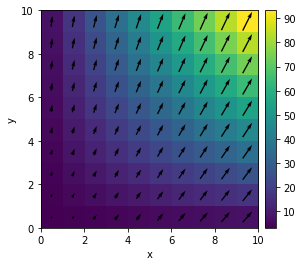

In [4]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
%matplotlib inline
field.plot_plane("z")

This vector field can now be saved in an OOMMF omf file, by using write_oommf_file method and providing a filename.

In [5]:
filename = 'vector_field.omf'
field.write(filename, representation="bin8")

Now when we have the OOMMF vector field file, we can read it, which will create a different Field object.

In [6]:
loaded_field = df.read("vector_field.omf")

In [7]:
np.array_equal(loaded_field.array, field.array)

True